# Breast Cancer Prediction

import required libraries

In [68]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

Load the dataset

In [69]:
data=pd.read_csv("C:/Users/91741/Downloads/breast_cancer.csv") 

In [70]:
data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,outcome
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


EDA

In [71]:
data.shape

(569, 31)

In [72]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [73]:
data.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
outcome                    0
dtype: int64

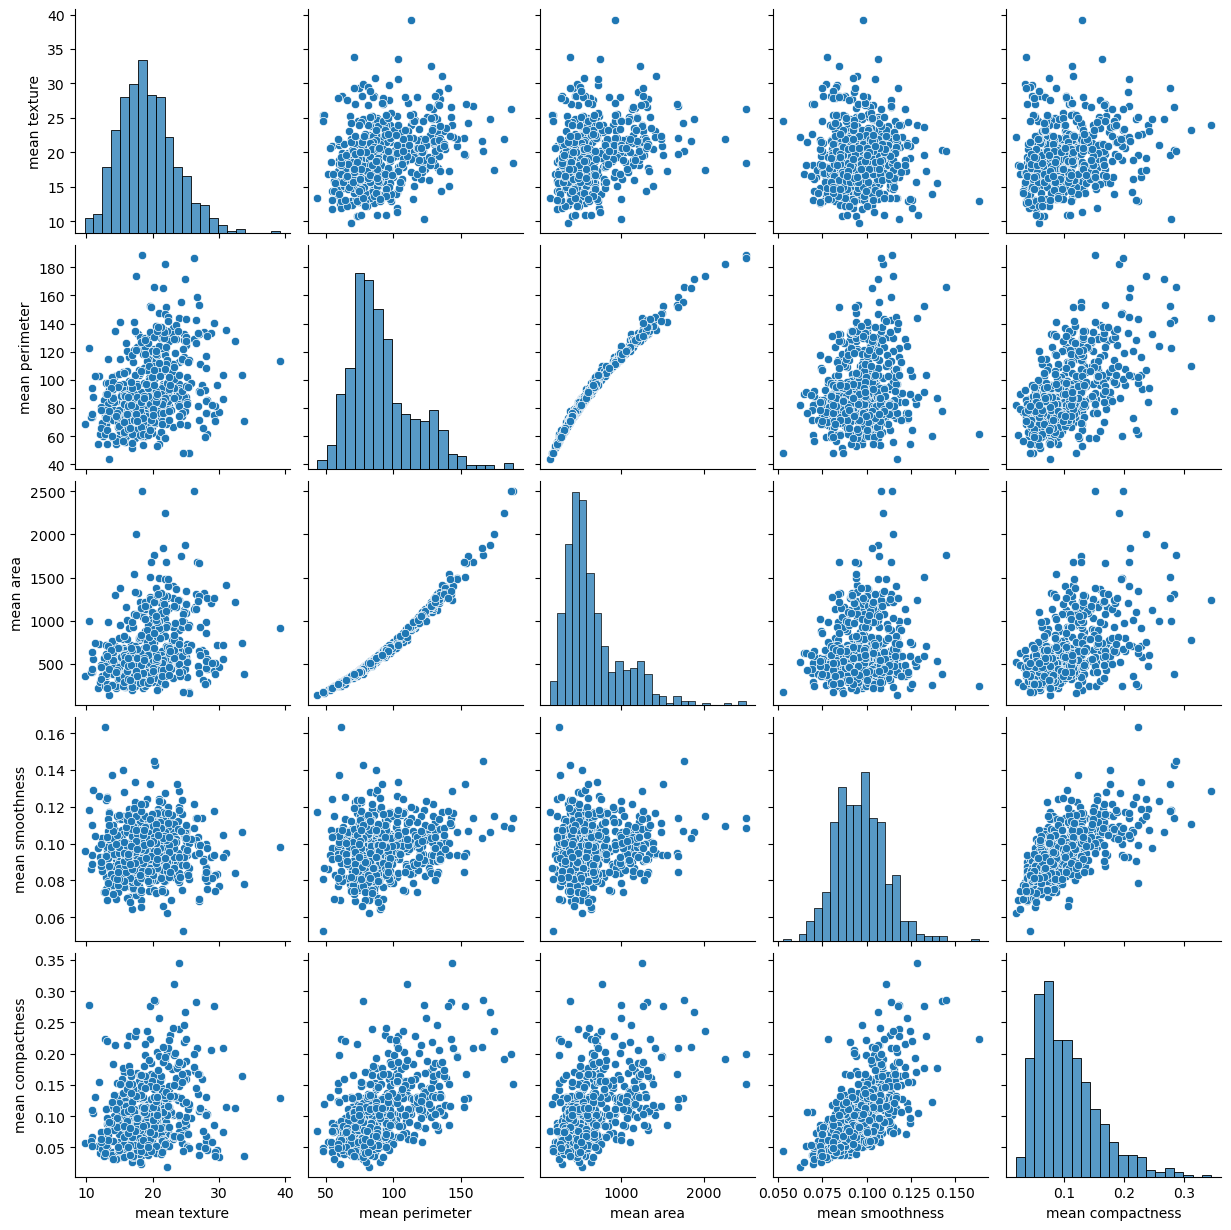

In [74]:
sns.pairplot(data.iloc[:,1:6])

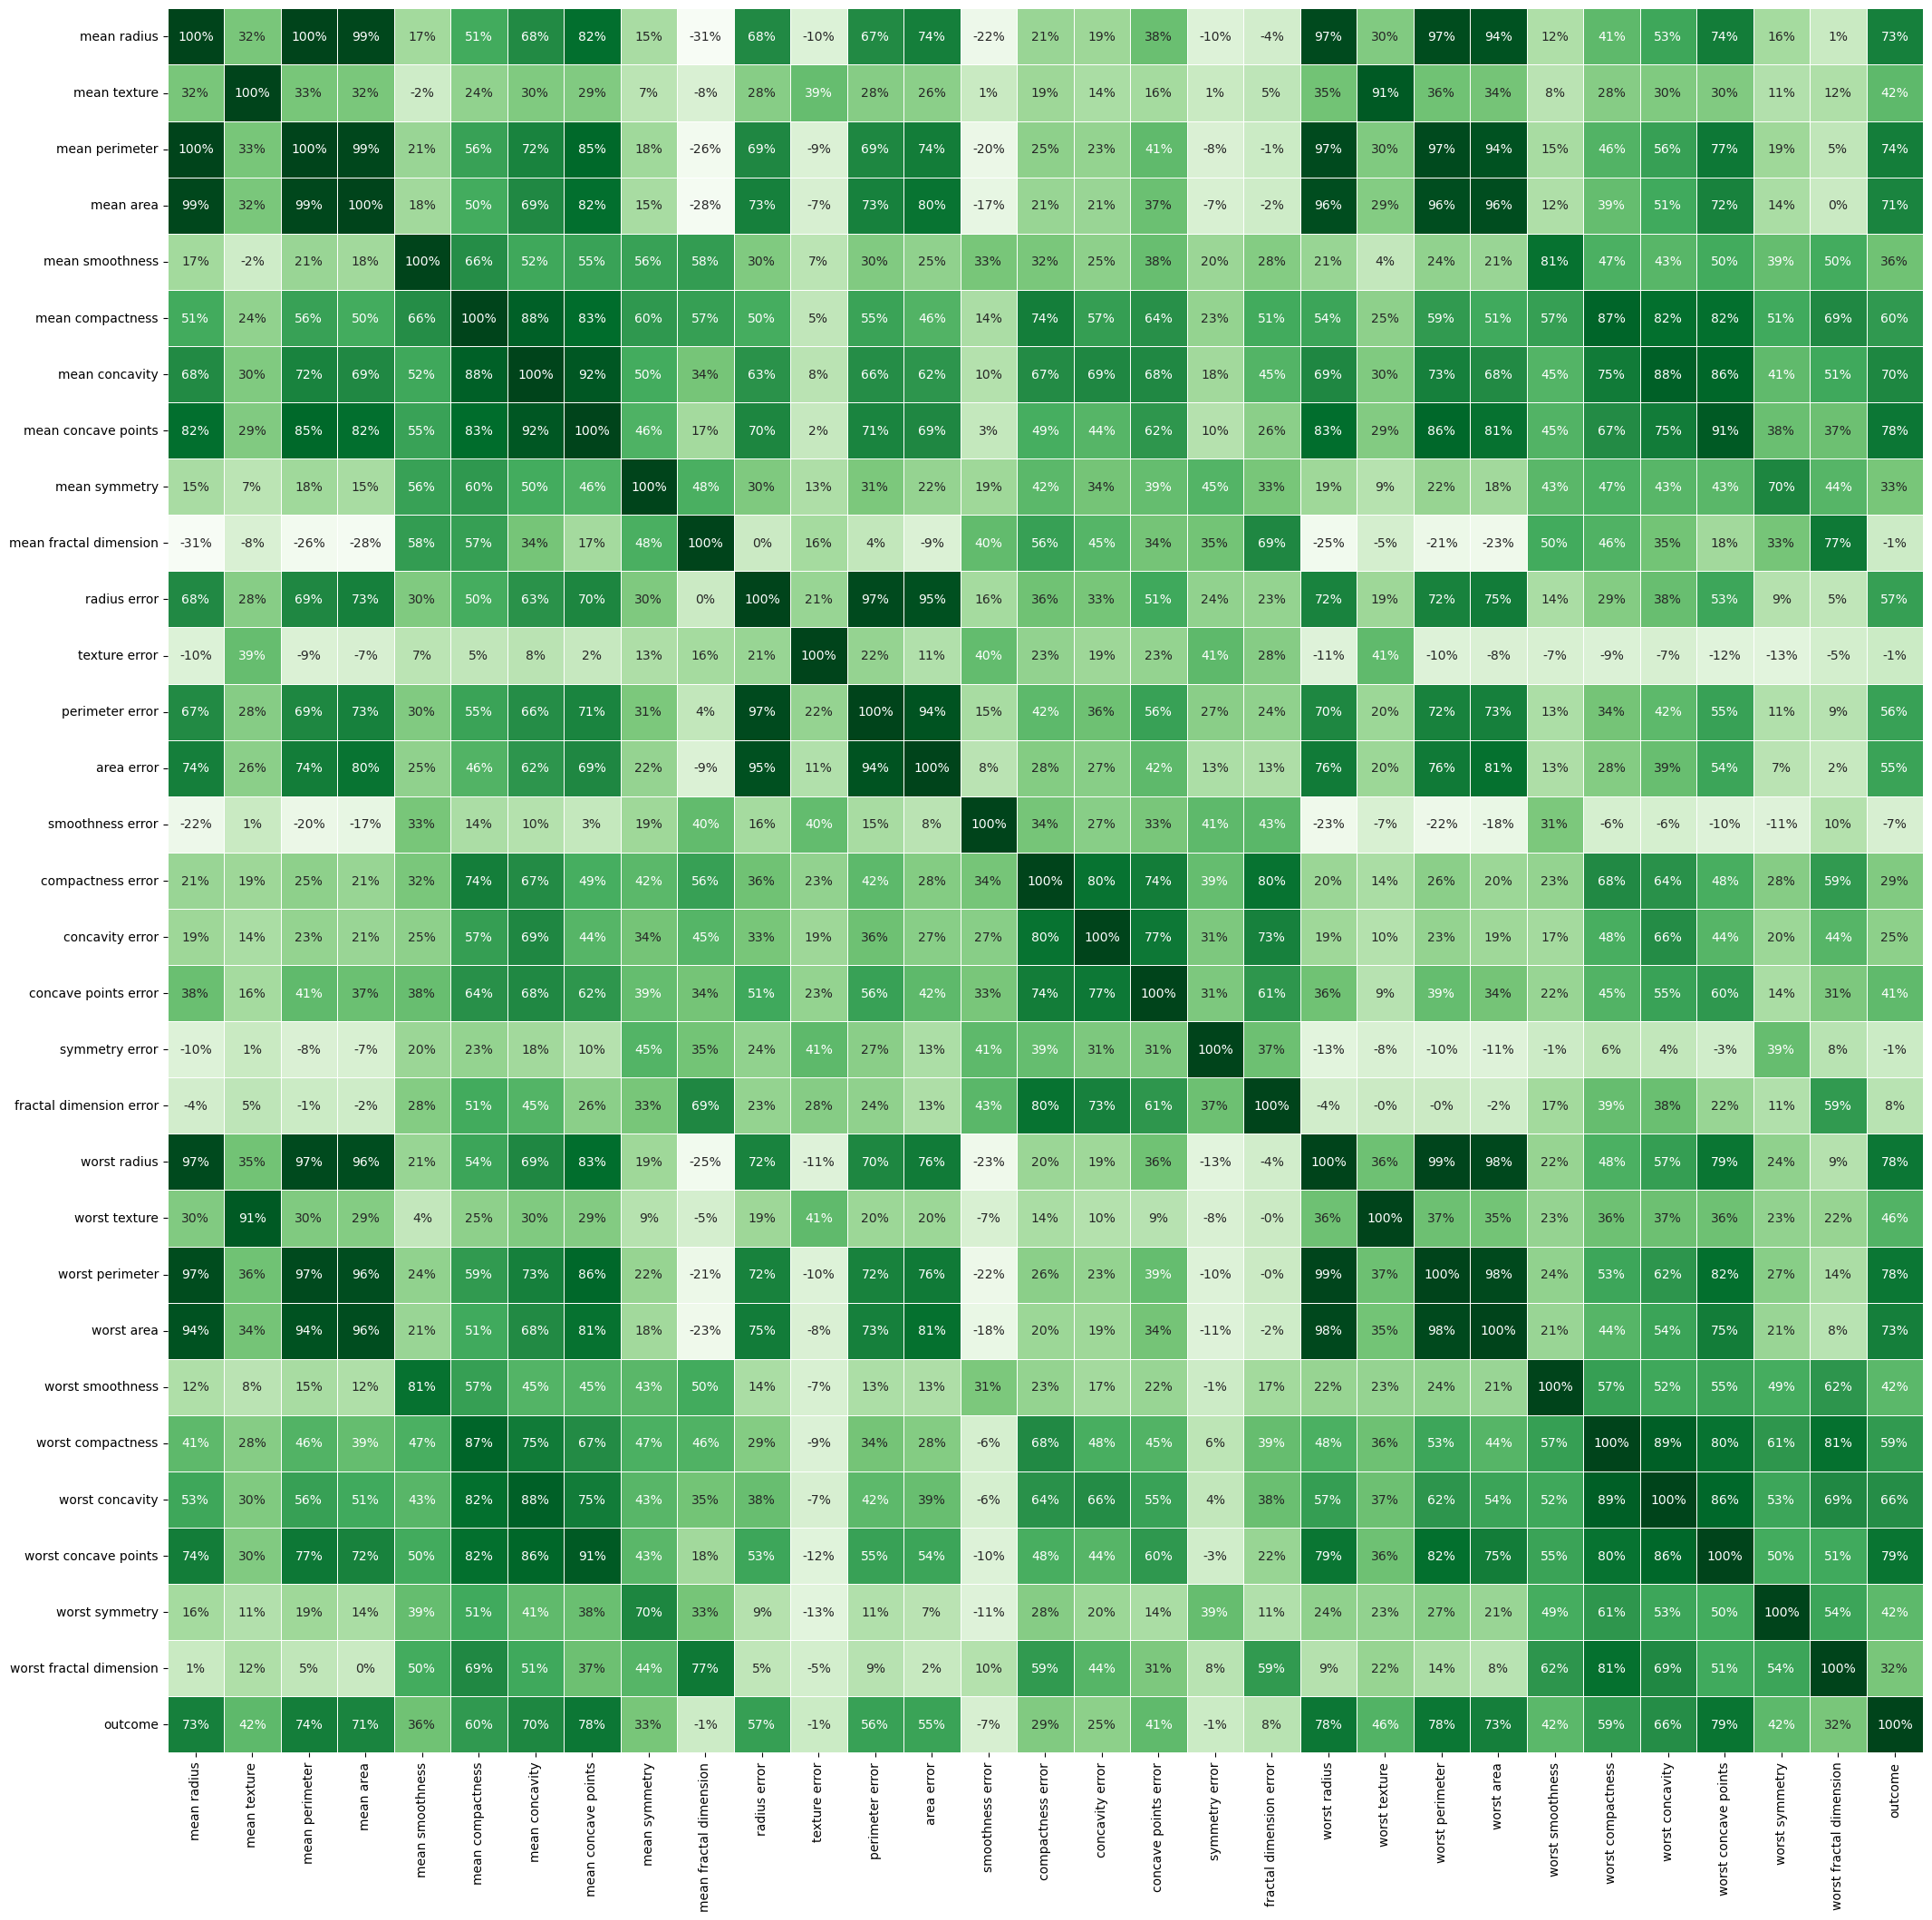

In [75]:
plt.figure(figsize=(25,25))
sns.heatmap(data.corr(),annot=True,linecolor='white',linewidths=0.4,cbar=False,cmap='Greens',fmt='.0%')
plt.show()

split the data into independent and dependent 


x-independent
| y-dependent(target variable)

In [76]:
x=data.drop(columns='outcome',axis=1) 

In [77]:
x.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [78]:
y=data.outcome

In [79]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: outcome, dtype: int64

Scaling the data

In [80]:
from sklearn.preprocessing import StandardScaler
s=StandardScaler()
xscale=pd.DataFrame(s.fit_transform(x),columns=x.columns)
xscale.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


Splitting the data

In [81]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(xscale,y,random_state=0,test_size=0.2)

In [82]:
xtrain.shape

(455, 30)

In [83]:
xtest.shape

(114, 30)

Modeling

Logistic regression classifier

In [84]:
def classifier(xtrain,ytrain):
    from sklearn.linear_model import LogisticRegression
    Logistic=LogisticRegression(random_state=0)
    Logistic.fit(xtrain,ytrain)
    
    from sklearn.tree import DecisionTreeClassifier
    Tree=DecisionTreeClassifier(criterion='entropy',random_state=0)
    Tree.fit(xtrain,ytrain)
    
    from sklearn.ensemble import RandomForestClassifier
    Forest=RandomForestClassifier(criterion='entropy',n_estimators=10)
    Forest.fit(xtrain,ytrain)
    
    print("Accuracy of Logistic regression",Logistic.score(xtrain,ytrain))
    print("Accuracy of Decision Tree",Tree.score(xtrain,ytrain))
    print("Accuracy of Random Forest",Forest.score(xtrain,ytrain))
    
    return Logistic,Tree,Forest

In [85]:
model=classifier(xtrain,ytrain)

Accuracy of Logistic regression 0.989010989010989
Accuracy of Decision Tree 1.0
Accuracy of Random Forest 1.0


confusion matrix

In [86]:
for i in range(len(model)):
    print('Model',i) 
        
    print(pd.crosstab(ytest,model[i].predict(xtest)))
    print()

Model 0
col_0     0   1
outcome        
0        65   2
1         2  45

Model 1
col_0     0   1
outcome        
0        62   5
1         3  44

Model 2
col_0     0   1
outcome        
0        65   2
1         3  44



classification_report and accuracy_score

In [87]:
from sklearn.metrics import classification_report,accuracy_score

for i in range(len(model)):
    print('Model',i) 
    print(classification_report(ytest,model[i].predict(xtest)))
    print("Accuarcy score : ",accuracy_score(ytest,model[i].predict(xtest)))
    print()

Model 0
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        67
           1       0.96      0.96      0.96        47

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114

Accuarcy score :  0.9649122807017544

Model 1
              precision    recall  f1-score   support

           0       0.95      0.93      0.94        67
           1       0.90      0.94      0.92        47

    accuracy                           0.93       114
   macro avg       0.93      0.93      0.93       114
weighted avg       0.93      0.93      0.93       114

Accuarcy score :  0.9298245614035088

Model 2
              precision    recall  f1-score   support

           0       0.96      0.97      0.96        67
           1       0.96      0.94      0.95        47

    accuracy                           0.96       114
   macro avg       0.96     

From the above analysis we can conclude that using Logistic regression we can predict the breast cancer with 96.4% accuracy